# Candlesticks Engulfing patterns and statistical analysis
# Loading and preparing data

In [1]:
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv")
df.tail()

,Local time,open,high,low,close,volume
4322,14.10.2019 00:00:00.000 GMT+0300,1.10399,1.10428,1.10129,1.10281,150329.9600
4323,15.10.2019 00:00:00.000 GMT+0300,1.10281,1.10463,1.09915,1.10338,225114.4925
4324,16.10.2019 00:00:00.000 GMT+0300,1.10331,1.10857,1.10226,1.10720,224179.4392
4325,17.10.2019 00:00:00.000 GMT+0300,1.10724,1.11400,1.10653,1.11254,221922.6500
4326,18.10.2019 00:00:00.000 GMT+0300,1.11256,1.11727,1.11149,1.11723,143073.7750


In [5]:
#Check if NA values are in data
df.isna().sum()

Local time    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

# Identifying the Engulfing candle patterns

In [47]:
#Engulfing pattern signals
import random
def Revsignal1(df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(open[row]-close[row])
        bodydiffmin = 0.003 #=30 pips
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]<close[row-1] and
            open[row]>close[row] and 
            #open[row]>=close[row-1] and close[row]<open[row-1]):
            (open[row]-close[row-1])>=+0e-5 and close[row]<open[row-1]): #this gives us more results with a 5pip margin (now its 0)
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]>close[row-1] and
            open[row]<close[row] and 
            #open[row]<=close[row-1] and close[row]>open[row-1]):
            (open[row]-close[row-1])<=-0e-5 and close[row]>open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2]) #random betting, great to check whether our predictions are better
        #signal[row]=1
    return signal
df['signal1'] = Revsignal1(df)
df[df['signal1']==1].count()

Local time    131
open          131
high          131
low           131
close         131
volume        131
signal1       131
Trend         131
result        131
dtype: int64

In [48]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    piplim = 300e-5 #300 pips difference in 5 days, if yes we predict it as correct
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((high[line+i]-max(close[line],open[line]))>piplim) and ((min(close[line],open[line])-low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(close[line],open[line])-low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (high[line+i]-max(close[line],open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

df['Trend'] = mytarget(df,3) #3days
#df.head(30)


In [50]:
#Checking fall positives
import numpy as np
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=2 #result for bullish pattern, 1 bearish
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # false positives

0.8205128205128205


,Local time,open,high,low,close,volume,signal1,Trend,result
224,11.03.2004 00:00:00.000 GMT+0200,1.22216,1.23841,1.21627,1.23504,1.129471e+06,2,1.0,0
417,03.12.2004 00:00:00.000 GMT+0200,1.32682,1.34604,1.32513,1.34505,1.100705e+06,2,1.0,0
675,28.11.2005 00:00:00.000 GMT+0200,1.17096,1.19015,1.16806,1.18475,1.080417e+06,2,0.0,0
1049,27.04.2007 00:00:00.000 GMT+0300,1.36020,1.36830,1.35860,1.36540,1.024237e+06,2,1.0,0
1609,11.06.2009 00:00:00.000 GMT+0300,1.39863,1.41730,1.39440,1.41095,5.543684e+05,2,1.0,0
1689,30.09.2009 00:00:00.000 GMT+0300,1.45867,1.46739,1.45734,1.46376,7.987590e+04,2,1.0,0
2133,07.06.2011 00:00:00.000 GMT+0300,1.45766,1.46964,1.45646,1.46923,2.083190e+05,2,1.0,0
2174,03.08.2011 00:00:00.000 GMT+0300,1.42040,1.43448,1.41460,1.43243,3.184016e+05,2,1.0,0
2215,29.09.2011 00:00:00.000 GMT+0300,1.35433,1.36784,1.35205,1.35985,2.839137e+05,2,1.0,0
2244,08.11.2011 00:00:00.000 GMT+0200,1.37771,1.38480,1.37252,1.38339,2.502527e+05,2,1.0,0


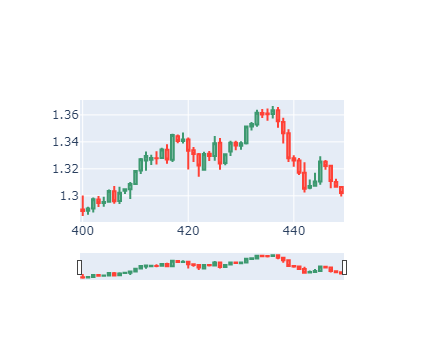

In [25]:
#Checking fall positives
dfpl = df[400:450]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.show()